# Parametros

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats as stat
from scipy.stats import kstest, mannwhitneyu
#from sklearn.cluster import AffinityPropagation
#import prince
PATH_2210 = "..\DownloadAll\E01_T_DEU_CONS_2210\E01_T_DEU_CONS_2210.csv"
PATH_2211 = "..\DownloadAll\E01_T_DEU_CONS_2211\E01_T_DEU_CONS_2211.csv"
PATH_2212 = "..\DownloadAll\E01_T_DEU_CONS_2212\E01_T_DEU_CONS_2212.csv"
PATH_2301 = "..\DownloadAll\E01_T_DEU_CONS_2301\E01_T_DEU_CONS_2301.csv"
PATH_2302 = "..\DownloadAll\E01_T_DEU_CONS_2302\E01_T_DEU_CONS_2302.csv"
PATH_2303 = "..\DownloadAll\E01_T_DEU_CONS_2303\E01_T_DEU_CONS_2303.csv"
PATH_DICC = "..\DownloadAll\Diccionario T_DEU_CONS.xlsx"
BANCO_CODS = [39,27]
MONEDA_CODS = [1,2,3] # Peso chileno, UF y dolar

In [44]:
DICC_CODFAM = list(pd.read_excel(PATH_DICC, sheet_name='CODFAM')['CODIGO'])[1:]
DICC_CODTLP = list(pd.read_excel(PATH_DICC, sheet_name='CODTLP')['CODIGO'])
DICC_PROD = list(pd.read_excel(PATH_DICC, sheet_name='CODPRO')['CODIGO'])[1:]

# A futuro definimos esto segun columnas
umbral = {'R': 5, 'Y': 10}

# Lectura de datos

In [45]:
#dfdict = pd.read_excel('E01_T_DEU_CONS/Diccionario T_DEU_CONS.xlsx')
#df2210 = pd.read_csv(PATH_2210, delimiter=";")
#df2211 = pd.read_csv(PATH_2211,delimiter=";")
#df2212 = pd.read_csv(PATH_2212,delimiter=";")
#df2301 = pd.read_csv(PATH_2301,delimiter=";")
#df2302 = pd.read_csv(PATH_2302,delimiter=";")
#df2303 = pd.read_csv(PATH_2303,delimiter=";")

In [46]:
PATH_2303 = "..\E01_T_DEU_CONS_2303_REV.csv"
PATH_2302 = "..\E01_T_DEU_CONS_2302_REV.csv"

# Tests

In [47]:
df_2303 = pd.read_csv(PATH_2303,delimiter=";")
df_2302 = pd.read_csv(PATH_2302,delimiter=";")

In [48]:
def df_dropna(DataFrame):
    return DataFrame.dropna()
def df_fillna_mean(Dataframe):
    return Dataframe.fillna(value = Dataframe.mean())
    

In [76]:
def Kolmogorov_condition(threshold,n,m):
    c_t = np.sqrt(-np.log(threshold/2)*0.5)
    print(c_t * np.sqrt((n+m)/(n*m)))
    return c_t * np.sqrt((n+m)/(n*m))


## Kolmogorov Test

In [77]:
def Kolmogorov_test(new_df,old_df,column,threshold,na_action=df_dropna):
    ks_statistic, p_value = kstest(na_action(new_df[column]), na_action(old_df[column]))
    size_n = len(na_action(new_df[column]))
    size_m = len(na_action(old_df[column]))
    condition = Kolmogorov_condition(threshold,size_n,size_m)
    if ks_statistic > condition:
        return("No Cumple",ks_statistic, p_value)
    return("Cumple",ks_statistic, p_value)


### MTOREV

In [78]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOREV",0.05,df_dropna)

# Print the results

print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0012183755790419726
Resultado: Cumple
KS statistic: 7.82799114207311e-06
P-value: 1.0


### SALMD

In [79]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"SALMD",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0020158608281832307
Resultado: Cumple
KS statistic: 0.0013133521300898472
P-value: 0.41368197105958027


### GASTO

In [80]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"GASTO",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.00020811327687997316
P-value: 0.9999999781510335


### ULTXCO

In [81]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"ULTXCO",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0012429955624520448
Resultado: Cumple
KS statistic: 0.0
P-value: 1.0


### MTOVENC

In [82]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"MTOVENC",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011372034487550974
Resultado: Cumple
KS statistic: 0.000700413714716297
P-value: 0.485888419712187


### TASAINT

In [85]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"TASAINT",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0011726535183523583
Resultado: No Cumple
KS statistic: 0.005865404493531123
P-value: 1.6544026819967021e-40


### SPROM

In [86]:
resultado, ks_statistic, p_value = Kolmogorov_test(df_2303,df_2302,"SPROM",0.05)

# Print the results
print("Resultado:",resultado)
print("KS statistic:", ks_statistic)
print("P-value:", p_value)

0.0020158608281832307
Resultado: No Cumple
KS statistic: 0.0031696446409908985
P-value: 0.00021844715595412782


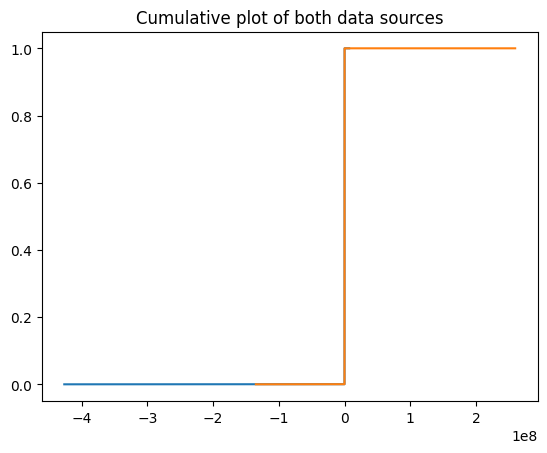

In [84]:
data_1 = df_2303["MTOREV"]
data_2 = df_2302["MTOREV"]
x = np.sort(df_dropna(data_1))
y = np.arange(len(x))/float(len(x))
plt.plot(x, y)
x2 = np.sort(df_dropna(data_2))
y2 = np.arange(len(x2))/float(len(x2))
plt.plot(x2, y2)
plt.title('Cumulative plot of both data sources')
plt.show()

## Mann-Whitney

In [58]:
def Mann_Whitney_Test(new_df,old_df,column,threshold,na_action=df_dropna):
    u_statistic, p_value = mannwhitneyu(na_action(new_df[column]), na_action(old_df[column]))
    if p_value < threshold:
        return("No Cumple",u_statistic, p_value)
    return("Cumple",u_statistic, p_value)


### MTOREV

In [59]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOREV",0.05)

# Print the results

print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 3087722201550.5
P-value: 0.9950578062355421


### SALMD

In [60]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"SALMD",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: No Cumple
U statistic: 411564500510.5
P-value: 2.514248769429729e-06


### GASTO

In [61]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"GASTO",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4067435878044.5
P-value: 0.673379873133851


### ULTXCO

In [62]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"ULTXCO",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 2850251302382.0
P-value: 1.0


### MTOVENC

In [63]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"MTOVENC",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 4065536614174.0
P-value: 0.1733179811086364


### TASAINT

In [64]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"TASAINT",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: No Cumple
U statistic: 3589420254157.0
P-value: 6.406484047016319e-07


### SPROM

In [65]:
resultado, u_statistic, p_value = Mann_Whitney_Test(df_2303,df_2302,"SPROM",0.05)

# Print the results
print("Resultado:",resultado)
print("U statistic:", u_statistic)
print("P-value:", p_value)

Resultado: Cumple
U statistic: 412613876675.0
P-value: 0.07254269011584882


In [87]:
def Tester(new_df,old_df,column,threshold,na_action=df_dropna):
    KS_results = list(Kolmogorov_test(new_df,old_df,column,threshold,na_action))
    MW_results = list(Mann_Whitney_Test(new_df,old_df,column,threshold,na_action))
    return {"KS":KS_results,"MW":MW_results}





In [91]:
print(Tester(df_2303,df_2302,"TASAINT",0.05,df_dropna))

0.0011726535183523583
{'KS': ['No Cumple', 0.005865404493531123, 1.6544026819967021e-40], 'MW': ['No Cumple', 3589420254157.0, 6.406484047016319e-07]}
